## 데이터 전처리 -3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### 1. Numpy를 활용한 데이터셋 생성

> 데이터전처리-2에서는 파이썬 내장함수를 통해 데이터전처리함
> 넘파이 쓰면 더 쉽게 할 수 있음

- fish(도미+빙어)데이터 불러옴

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- np.column_stack() : 데이터를 컬럼끼리 쉽게 합칠 수 있음
- np.ones(5)  : 길이 5의 1.0로 채워진 배열 생성
- np.zeros(5) : 길이 5의 0.0로 채워진 배열 생성

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5]) #0~4번까지 프린트

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


- 타겟데이터 만들기
    - np.concatenate() : 2개의 배열을 한줄로 합침

In [4]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [5]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 2. Scikit-learn으로 Train/Test데이터 나누기

- train_test_split() : 데이터 분할, 랜덤 시드 지정 가능
    - 비율 default  :  7.2:2.5

In [6]:
tarin_input, test_input, train_target, test_target =train_test_split(fish_data, fish_target, random_state=42)

In [7]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


>- 도미 35마리, 빙어 14마리이므로 2.5:1 비율
>- train_test_split() 으로 뽑은 생선 13마리는 도미 10마리, 빙어 3마리 : 그냥 랜덤으로 뽑으면 제대로 섞이지 않음

- startify=test_target으로 바꿔줌
    - Class 비율에 맞게 데이터셋 분할

In [8]:
    train_input, test_input, train_target, test_target =train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [9]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


>알맞게 섞임

### 3. 데이터 정규화 필요성

In [10]:
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

- 임의 데이터[25.150] 예측시켜봄

In [11]:
print(kn.predict([[25,150]]))

[0.]


>빙어로 예측함

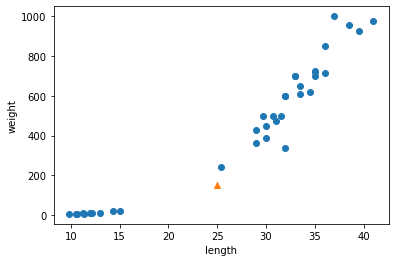

In [12]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> - 그래프상 도미쪽에 가까운데 분류를 빙어로 함.
> - x축은 5단위인데 y축은 200단위 = > 데이터 정규화 필요!

- 모델이 뽑은 5개의 이웃 그래프상으로 확인해보기

In [13]:
distances, indexes = kn.kneighbors([[25,150]])

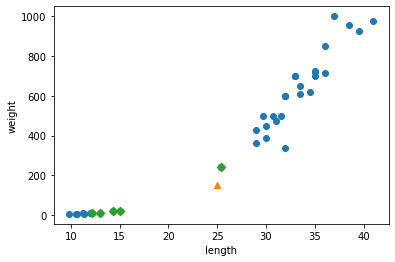

In [14]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [16]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


> 빙어를 더 많이 뽑았음을 볼 수 있음 : y축이 더 가중치가 크기 때문

### 4. 정규화, Normalization

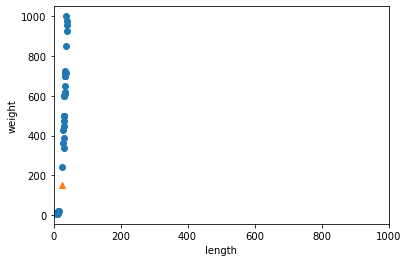

In [17]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker="^")
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### 4-1 표준점수(standard score) 또는 z score를 사용한 정규화
- 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균 낸 것
- 표준편차 : 분산의 제곱근, 데이터가 분산된 정도를 나타냄
- 표준점수 : 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타냄.
    - 표준점수 = (특징 - mean)/std

In [18]:
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [19]:
train_scaled = (train_input - mean) / std #브로드 캐스팅
train_scaled[:5]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528]])

> scaled된 데이터들의 편차가 줄어듦

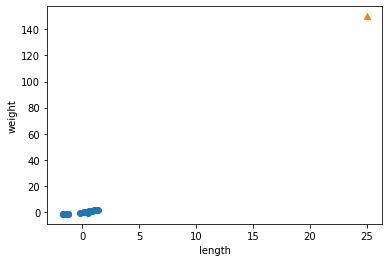

In [20]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

>정규화된 인풋 데이터들은 몰려 있음
>정규화 안된 실제 데이터는 멀리 떨어져 있음

- 예측할 데이터도 정규화를 해주어야 함

In [21]:
new = ([25,150] - mean) /std

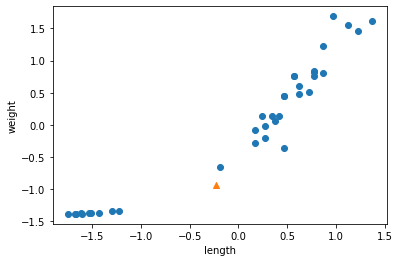

In [22]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 5. 정규화된 데이터로 다시 예측

- 테스트 데이터도 정규화

In [30]:
test_scaled = (test_input - mean)/std

In [31]:
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

1.0

- 정규화된 모델로 정규화된 임의 데이터 분류

In [32]:
print(kn.predict([new]))

[1.]


>정상적으로 도미로 분류

# 데이터 전처리 정리

1. 모든 데이터에 대해 특징(x) / 정답(y)데이터로 분할
    - 특징(길이, 무게) / 정답(0,1)

2. Train/Test 데이터 분리
    - 7:3 or 8:2
    - 클래스별로 분리
        - 각 분할에 클래스가 똑같이 들어있어야 함. ex) train데이터 7 안에 남자와 여자가 5:5로 들어있어야함

3. 정규화-특징 데이터
    - 표준점수 정규화(z-score)
    - 0 ~ 1로 정규화 (min-max scale) : 비추 (min ~ max범위 외의 데이터가 들어올 수 있음)

- 예측 전실제 데이터 정규화